In [93]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('./Sales_Data/Sales_August_2019.csv')

In [95]:
df.shape

(12011, 6)

In [96]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [97]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [98]:
df.isnull().sum()

Order ID            28
Product             28
Quantity Ordered    28
Price Each          28
Order Date          28
Purchase Address    28
dtype: int64

In [99]:
for index, row in df.iterrows():
    print(index, row['Quantity Ordered'])

0 2
1 1
2 1
3 2
4 2
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 2
30 1
31 1
32 1
33 1
34 1
35 3
36 1
37 2
38 1
39 1
40 1
41 1
42 2
43 1
44 1
45 1
46 2
47 1
48 1
49 1
50 1
51 1
52 1
53 2
54 1
55 1
56 3
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 2
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 2
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 2
102 1
103 1
104 1
105 1
106 1
107 2
108 2
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 2
117 1
118 1
119 1
120 1
121 1
122 1
123 2
124 1
125 1
126 1
127 1
128 4
129 1
130 1
131 2
132 1
133 1
134 1
135 1
136 1
137 4
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 2
149 1
150 1
151 1
152 1
153 1
154 1
155 2
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 1
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 3
183 1
184 1


1574 1
1575 1
1576 1
1577 1
1578 1
1579 1
1580 1
1581 1
1582 1
1583 1
1584 1
1585 1
1586 1
1587 1
1588 1
1589 1
1590 1
1591 1
1592 1
1593 1
1594 1
1595 1
1596 1
1597 1
1598 1
1599 1
1600 1
1601 1
1602 1
1603 1
1604 1
1605 1
1606 1
1607 1
1608 1
1609 1
1610 1
1611 1
1612 1
1613 1
1614 1
1615 1
1616 1
1617 1
1618 1
1619 1
1620 1
1621 1
1622 1
1623 1
1624 1
1625 1
1626 1
1627 1
1628 1
1629 1
1630 1
1631 1
1632 2
1633 1
1634 1
1635 1
1636 1
1637 1
1638 1
1639 2
1640 1
1641 1
1642 1
1643 1
1644 1
1645 1
1646 1
1647 1
1648 1
1649 3
1650 1
1651 1
1652 1
1653 1
1654 1
1655 2
1656 1
1657 1
1658 1
1659 1
1660 1
1661 1
1662 1
1663 1
1664 1
1665 1
1666 1
1667 1
1668 1
1669 1
1670 1
1671 2
1672 1
1673 1
1674 1
1675 1
1676 1
1677 1
1678 1
1679 1
1680 1
1681 1
1682 1
1683 1
1684 1
1685 1
1686 2
1687 1
1688 1
1689 1
1690 1
1691 1
1692 1
1693 1
1694 1
1695 1
1696 1
1697 1
1698 1
1699 1
1700 1
1701 1
1702 1
1703 1
1704 1
1705 1
1706 1
1707 1
1708 4
1709 1
1710 1
1711 2
1712 1
1713 1
1714 1
1715 1
1716 1

2824 1
2825 2
2826 2
2827 1
2828 1
2829 1
2830 1
2831 1
2832 1
2833 1
2834 1
2835 1
2836 1
2837 1
2838 1
2839 1
2840 1
2841 1
2842 1
2843 1
2844 1
2845 2
2846 1
2847 1
2848 1
2849 1
2850 1
2851 1
2852 1
2853 2
2854 1
2855 1
2856 1
2857 1
2858 1
2859 4
2860 1
2861 1
2862 1
2863 1
2864 2
2865 4
2866 1
2867 1
2868 1
2869 1
2870 2
2871 1
2872 2
2873 1
2874 1
2875 1
2876 1
2877 1
2878 1
2879 1
2880 1
2881 2
2882 1
2883 1
2884 1
2885 1
2886 1
2887 1
2888 1
2889 1
2890 1
2891 1
2892 1
2893 1
2894 1
2895 1
2896 1
2897 1
2898 1
2899 1
2900 2
2901 1
2902 1
2903 1
2904 1
2905 1
2906 1
2907 1
2908 1
2909 1
2910 1
2911 2
2912 1
2913 1
2914 1
2915 1
2916 1
2917 2
2918 1
2919 7
2920 1
2921 1
2922 2
2923 2
2924 1
2925 1
2926 1
2927 1
2928 1
2929 1
2930 2
2931 1
2932 1
2933 2
2934 1
2935 1
2936 1
2937 1
2938 1
2939 1
2940 1
2941 1
2942 1
2943 1
2944 1
2945 2
2946 1
2947 2
2948 1
2949 2
2950 2
2951 1
2952 1
2953 1
2954 1
2955 1
2956 1
2957 1
2958 1
2959 1
2960 1
2961 1
2962 1
2963 1
2964 1
2965 1
2966 1

4073 1
4074 1
4075 1
4076 2
4077 1
4078 1
4079 1
4080 2
4081 1
4082 1
4083 1
4084 1
4085 1
4086 1
4087 1
4088 1
4089 1
4090 1
4091 1
4092 1
4093 1
4094 2
4095 1
4096 1
4097 1
4098 1
4099 1
4100 1
4101 1
4102 1
4103 1
4104 1
4105 1
4106 3
4107 1
4108 1
4109 1
4110 1
4111 1
4112 1
4113 1
4114 1
4115 1
4116 1
4117 1
4118 1
4119 1
4120 1
4121 1
4122 1
4123 1
4124 1
4125 1
4126 1
4127 1
4128 1
4129 1
4130 1
4131 1
4132 1
4133 1
4134 1
4135 1
4136 2
4137 1
4138 1
4139 1
4140 1
4141 1
4142 1
4143 1
4144 1
4145 1
4146 1
4147 1
4148 1
4149 1
4150 1
4151 1
4152 2
4153 1
4154 1
4155 1
4156 1
4157 1
4158 1
4159 1
4160 2
4161 1
4162 1
4163 1
4164 1
4165 1
4166 1
4167 1
4168 1
4169 1
4170 1
4171 1
4172 1
4173 1
4174 1
4175 1
4176 1
4177 1
4178 3
4179 1
4180 1
4181 1
4182 1
4183 1
4184 2
4185 1
4186 1
4187 1
4188 1
4189 1
4190 1
4191 1
4192 1
4193 1
4194 1
4195 1
4196 1
4197 1
4198 1
4199 1
4200 1
4201 1
4202 1
4203 1
4204 1
4205 1
4206 1
4207 1
4208 1
4209 1
4210 1
4211 1
4212 1
4213 1
4214 1
4215 1

5323 1
5324 1
5325 1
5326 1
5327 1
5328 1
5329 1
5330 1
5331 1
5332 1
5333 1
5334 1
5335 1
5336 1
5337 1
5338 1
5339 1
5340 1
5341 1
5342 1
5343 1
5344 1
5345 1
5346 1
5347 1
5348 1
5349 1
5350 1
5351 1
5352 1
5353 1
5354 1
5355 1
5356 1
5357 1
5358 1
5359 1
5360 3
5361 1
5362 1
5363 1
5364 1
5365 2
5366 1
5367 1
5368 1
5369 1
5370 2
5371 1
5372 1
5373 1
5374 2
5375 1
5376 1
5377 1
5378 1
5379 1
5380 1
5381 1
5382 1
5383 1
5384 1
5385 1
5386 1
5387 1
5388 1
5389 1
5390 1
5391 1
5392 1
5393 1
5394 1
5395 1
5396 1
5397 1
5398 1
5399 1
5400 1
5401 3
5402 1
5403 1
5404 1
5405 1
5406 1
5407 1
5408 1
5409 1
5410 2
5411 1
5412 1
5413 1
5414 1
5415 1
5416 1
5417 1
5418 1
5419 1
5420 1
5421 1
5422 1
5423 1
5424 1
5425 1
5426 1
5427 1
5428 1
5429 1
5430 1
5431 1
5432 1
5433 1
5434 1
5435 1
5436 1
5437 1
5438 3
5439 1
5440 1
5441 1
5442 1
5443 1
5444 1
5445 1
5446 1
5447 1
5448 2
5449 1
5450 4
5451 1
5452 1
5453 1
5454 1
5455 1
5456 1
5457 1
5458 1
5459 1
5460 1
5461 1
5462 1
5463 1
5464 1
5465 1

6572 1
6573 1
6574 1
6575 4
6576 1
6577 1
6578 1
6579 1
6580 1
6581 1
6582 1
6583 1
6584 1
6585 1
6586 1
6587 1
6588 1
6589 1
6590 1
6591 1
6592 1
6593 1
6594 1
6595 1
6596 2
6597 1
6598 1
6599 1
6600 1
6601 nan
6602 1
6603 1
6604 1
6605 1
6606 1
6607 1
6608 1
6609 1
6610 1
6611 1
6612 1
6613 1
6614 1
6615 1
6616 1
6617 1
6618 1
6619 1
6620 1
6621 1
6622 1
6623 1
6624 1
6625 1
6626 1
6627 1
6628 1
6629 1
6630 1
6631 1
6632 1
6633 1
6634 1
6635 1
6636 1
6637 1
6638 1
6639 1
6640 1
6641 1
6642 4
6643 1
6644 1
6645 1
6646 1
6647 1
6648 1
6649 1
6650 2
6651 1
6652 1
6653 1
6654 1
6655 1
6656 1
6657 1
6658 1
6659 2
6660 1
6661 1
6662 1
6663 2
6664 1
6665 1
6666 1
6667 1
6668 1
6669 1
6670 1
6671 1
6672 1
6673 1
6674 2
6675 1
6676 2
6677 1
6678 1
6679 1
6680 1
6681 2
6682 1
6683 1
6684 1
6685 1
6686 3
6687 1
6688 1
6689 1
6690 2
6691 1
6692 1
6693 1
6694 1
6695 1
6696 1
6697 2
6698 1
6699 1
6700 1
6701 1
6702 1
6703 1
6704 2
6705 1
6706 1
6707 1
6708 1
6709 1
6710 1
6711 2
6712 1
6713 1
6714

7745 1
7746 2
7747 2
7748 1
7749 1
7750 1
7751 1
7752 1
7753 1
7754 1
7755 1
7756 1
7757 Quantity Ordered
7758 1
7759 1
7760 1
7761 1
7762 1
7763 1
7764 3
7765 1
7766 2
7767 1
7768 2
7769 1
7770 1
7771 1
7772 1
7773 1
7774 1
7775 1
7776 1
7777 1
7778 1
7779 1
7780 2
7781 1
7782 1
7783 1
7784 1
7785 1
7786 1
7787 1
7788 1
7789 1
7790 1
7791 1
7792 1
7793 2
7794 1
7795 1
7796 1
7797 1
7798 1
7799 1
7800 1
7801 1
7802 1
7803 1
7804 1
7805 1
7806 1
7807 1
7808 1
7809 4
7810 1
7811 1
7812 1
7813 1
7814 1
7815 1
7816 1
7817 1
7818 2
7819 1
7820 2
7821 1
7822 1
7823 1
7824 1
7825 1
7826 1
7827 3
7828 1
7829 1
7830 1
7831 1
7832 1
7833 1
7834 2
7835 1
7836 1
7837 1
7838 1
7839 1
7840 1
7841 1
7842 1
7843 1
7844 1
7845 1
7846 1
7847 1
7848 1
7849 1
7850 1
7851 1
7852 2
7853 1
7854 1
7855 1
7856 2
7857 1
7858 1
7859 1
7860 1
7861 1
7862 1
7863 1
7864 1
7865 1
7866 1
7867 1
7868 1
7869 1
7870 1
7871 1
7872 1
7873 1
7874 1
7875 1
7876 1
7877 1
7878 1
7879 1
7880 2
7881 1
7882 1
7883 1
7884 1
7885 

8977 1
8978 1
8979 1
8980 1
8981 1
8982 2
8983 1
8984 1
8985 1
8986 1
8987 1
8988 2
8989 1
8990 1
8991 1
8992 1
8993 1
8994 1
8995 1
8996 1
8997 2
8998 1
8999 1
9000 1
9001 1
9002 1
9003 1
9004 1
9005 1
9006 1
9007 1
9008 1
9009 1
9010 5
9011 1
9012 1
9013 1
9014 1
9015 1
9016 1
9017 1
9018 2
9019 1
9020 1
9021 1
9022 1
9023 1
9024 1
9025 1
9026 2
9027 1
9028 2
9029 1
9030 1
9031 1
9032 1
9033 1
9034 1
9035 1
9036 2
9037 1
9038 1
9039 1
9040 1
9041 2
9042 1
9043 1
9044 1
9045 1
9046 1
9047 3
9048 1
9049 1
9050 1
9051 1
9052 1
9053 1
9054 1
9055 1
9056 1
9057 1
9058 1
9059 4
9060 2
9061 1
9062 2
9063 2
9064 1
9065 1
9066 1
9067 1
9068 1
9069 1
9070 1
9071 1
9072 1
9073 2
9074 1
9075 1
9076 1
9077 1
9078 1
9079 1
9080 1
9081 1
9082 1
9083 1
9084 1
9085 1
9086 1
9087 2
9088 1
9089 1
9090 1
9091 1
9092 1
9093 1
9094 1
9095 1
9096 1
9097 1
9098 1
9099 1
9100 1
9101 1
9102 1
9103 1
9104 1
9105 1
9106 1
9107 1
9108 1
9109 1
9110 1
9111 1
9112 2
9113 1
9114 1
9115 1
9116 1
9117 1
9118 1
9119 1

10225 3
10226 1
10227 1
10228 1
10229 1
10230 1
10231 1
10232 1
10233 1
10234 1
10235 1
10236 1
10237 1
10238 1
10239 1
10240 1
10241 1
10242 1
10243 1
10244 1
10245 1
10246 1
10247 1
10248 1
10249 1
10250 3
10251 1
10252 1
10253 1
10254 1
10255 1
10256 1
10257 1
10258 1
10259 1
10260 1
10261 2
10262 1
10263 1
10264 1
10265 1
10266 1
10267 1
10268 1
10269 1
10270 1
10271 1
10272 1
10273 1
10274 1
10275 1
10276 2
10277 1
10278 2
10279 2
10280 1
10281 1
10282 1
10283 1
10284 1
10285 2
10286 1
10287 1
10288 1
10289 1
10290 3
10291 1
10292 1
10293 1
10294 1
10295 1
10296 1
10297 1
10298 1
10299 1
10300 1
10301 2
10302 1
10303 1
10304 2
10305 2
10306 2
10307 1
10308 1
10309 1
10310 1
10311 1
10312 1
10313 1
10314 1
10315 1
10316 1
10317 1
10318 3
10319 1
10320 1
10321 1
10322 1
10323 1
10324 1
10325 1
10326 1
10327 1
10328 2
10329 1
10330 1
10331 1
10332 1
10333 1
10334 1
10335 1
10336 1
10337 1
10338 Quantity Ordered
10339 1
10340 1
10341 1
10342 3
10343 1
10344 1
10345 1
10346 1
10347 3
1

11497 2
11498 1
11499 1
11500 1
11501 1
11502 1
11503 1
11504 2
11505 1
11506 1
11507 1
11508 1
11509 1
11510 2
11511 1
11512 1
11513 1
11514 1
11515 1
11516 1
11517 1
11518 1
11519 1
11520 2
11521 1
11522 1
11523 4
11524 1
11525 1
11526 1
11527 1
11528 1
11529 1
11530 1
11531 1
11532 1
11533 1
11534 1
11535 1
11536 1
11537 1
11538 1
11539 1
11540 3
11541 1
11542 1
11543 1
11544 1
11545 1
11546 2
11547 1
11548 1
11549 1
11550 1
11551 1
11552 1
11553 1
11554 1
11555 1
11556 1
11557 1
11558 1
11559 1
11560 1
11561 1
11562 1
11563 1
11564 1
11565 1
11566 1
11567 1
11568 1
11569 1
11570 1
11571 1
11572 1
11573 1
11574 1
11575 1
11576 1
11577 1
11578 1
11579 2
11580 1
11581 1
11582 1
11583 1
11584 1
11585 1
11586 1
11587 1
11588 1
11589 1
11590 1
11591 1
11592 3
11593 1
11594 1
11595 1
11596 1
11597 1
11598 1
11599 1
11600 1
11601 1
11602 1
11603 1
11604 1
11605 1
11606 1
11607 1
11608 1
11609 1
11610 1
11611 1
11612 1
11613 1
11614 2
11615 1
11616 2
11617 1
11618 1
11619 1
11620 2
11621 1


In [100]:
df.dropna(how = 'all', inplace = True)

In [101]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [102]:
df.shape

(11983, 6)

In [103]:
df = df.loc[~df['Quantity Ordered'].str.contains('^qu[a-z]',flags = re.I, regex = True)]

In [104]:
df.shape

(11957, 6)

In [105]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [106]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

### Question 1: What was the best day for sales? How much was earned that day?

In [107]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [108]:
df['Day'] = df['Order Date'].dt.day

Text(0, 0.5, 'Sales in usd')

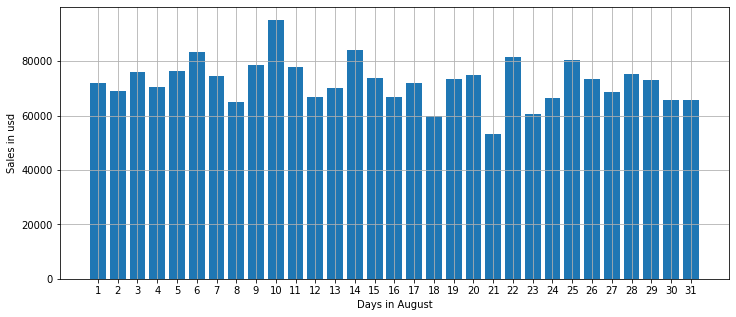

In [109]:
plt.rcParams['figure.figsize'] = (12,5)

days = [day for day, df in df.groupby('Day')]
plt.bar(days, df.groupby('Day').sum()['Sales'])
plt.grid()
plt.xticks(days)
plt.xlabel('Days in August')
plt.ylabel('Sales in usd')

### Question 2: What city had the highest number of sales?

In [110]:
def get_city(x):
    return x.split(',')[1]
def get_state(x):
    return x.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

Text(0, 0.5, 'Sales in usd')

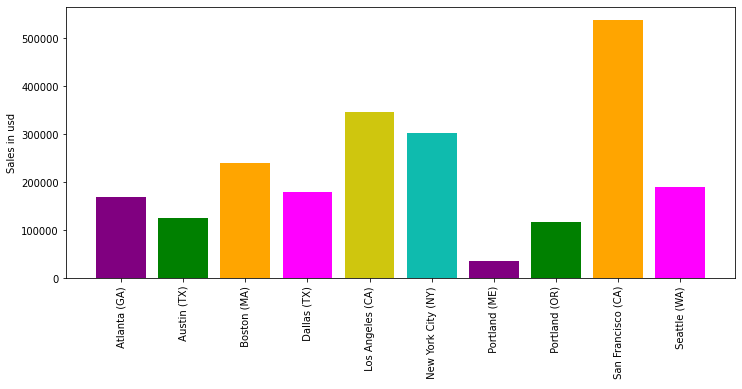

In [111]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",]


cities = [city for city, df in df.groupby('City')]

plt.bar(cities, df.groupby('City').sum()['Sales'], color = colors)
plt.xticks(rotation = 90)
plt.ylabel('Sales in usd')

### Question 3: What time should we display adversetisments to maxmize likelihood of customer's buying product?

In [112]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Day,City
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,31,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,15,Dallas (TX)
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,6,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,29,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,15,New York City (NY)


In [113]:
df['Hour'] = df['Order Date'].dt.hour

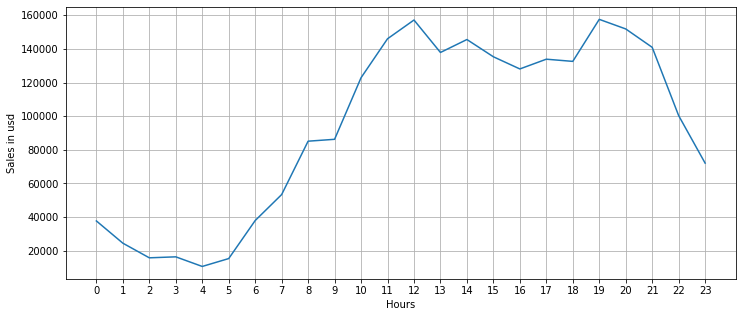

In [114]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot(hours, df.groupby('Hour').sum()['Sales'])
plt.xlabel('Hours')
plt.ylabel('Sales in usd')
plt.xticks(hours)
plt.grid()
plt.show()

### Question 4: What products are most often sold together?

In [115]:
dup_id = df[df['Order ID'].duplicated(keep = False)]
dup_id['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
dup_id.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Day,City,Hour,grouped
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",7.68,17,San Francisco (CA),20,"AA Batteries (4-pack),USB-C Charging Cable"
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",11.95,17,San Francisco (CA),20,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",700.00,9,San Francisco (CA),9,"iPhone,Apple Airpods Headphones"
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",150.00,9,San Francisco (CA),9,"iPhone,Apple Airpods Headphones"
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",600.00,2,New York City (NY),10,"Google Phone,Wired Headphones"


In [117]:
dup_id = dup_id[['Order ID','grouped']].drop_duplicates()

In [118]:
dup_id.head()

,Order ID,grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [119]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_id['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 66
('Google Phone', 'USB-C Charging Cable') 61
('iPhone', 'Apple Airpods Headphones') 26
('Google Phone', 'Wired Headphones') 23
('Vareebadd Phone', 'USB-C Charging Cable') 22
('iPhone', 'Wired Headphones') 22
('Google Phone', 'Bose SoundSport Headphones') 12
('USB-C Charging Cable', 'Wired Headphones') 9
('Vareebadd Phone', 'Bose SoundSport Headphones') 9
('Vareebadd Phone', 'Wired Headphones') 7


### Question 5: What product sold the most? Why do you think it sold the best?

In [120]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Day,City,Hour
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",23.98,31,Seattle (WA),22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",99.99,15,Dallas (TX),15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",700.00,6,Portland (OR),14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",7.68,29,Los Angeles (CA),20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",7.68,15,New York City (NY),19


Text(0, 0.5, 'Quantity Ordered')

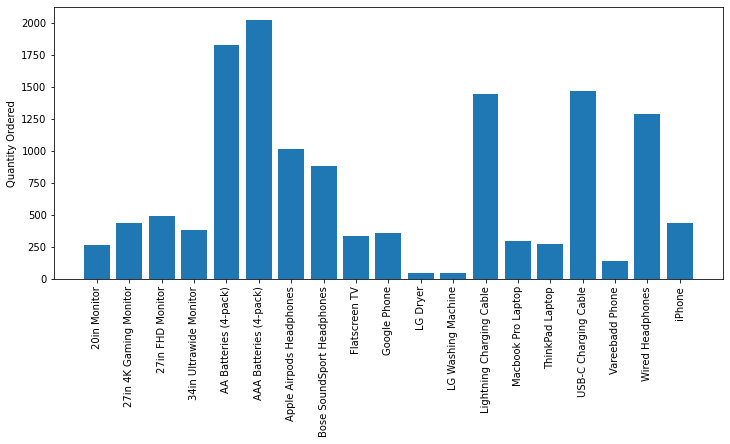

In [134]:
products = [pro for pro, df in df.groupby('Product')]

plt.bar(products, df.groupby('Product').sum()['Quantity Ordered'])
plt.xticks(rotation = 90)
plt.ylabel('Quantity Ordered')

/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

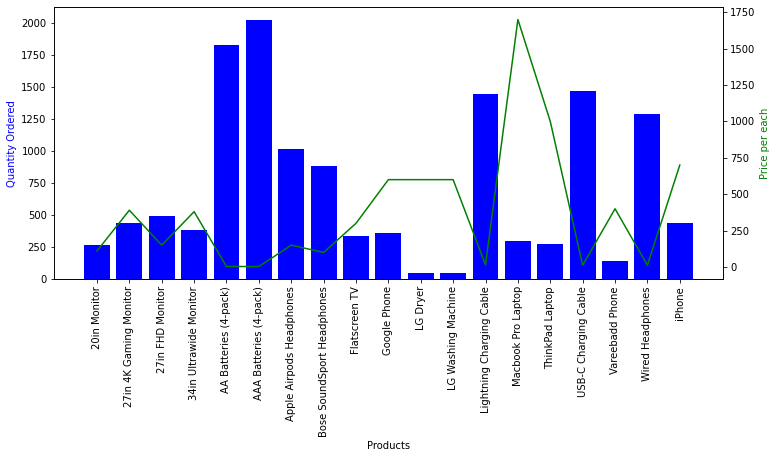

In [132]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products,df.groupby('Product').sum()['Quantity Ordered'], color = 'b')
ax2.plot(products, df.groupby('Product').mean()['Price Each'], color = 'g')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color = 'b')
ax2.set_ylabel('Price per each', color ='g')
ax1.set_xticklabels(products,rotation = 90)